In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

In [2]:
df = pd.read_csv('./survey-results-public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
num_rows = df.shape[0]
num_cols = df.shape[1]

print(num_rows)
print(num_cols)

51392
154


In [88]:
#Provide a set of columns with 0 missing values.
no_nulls = set(df.columns[df.notnull().all()])
print(no_nulls)
print(len(no_nulls))

{'ProgramHobby', 'Country', 'FormalEducation', 'Professional', 'EmploymentStatus', 'Respondent', 'University'}
7


In [113]:
# np.sum(df.isnull())
#df.columns[np.sum(df.isnull())=0]
#df.columns[np.sum(df.isnull())/df.shape[0]]

In [110]:
#check null columns in dataframe
# df.isnull().any()

In [96]:
#drop columns with missing values
# df.dropna(axis=1)

In [111]:
# no_nulls = df[['Respondent','Professional','ProgramHobby','Country','University','EmploymentStatus','FormalEducation']]

In [112]:
#Provide a set of columns with 0 values missing
# most_missing_cols = set(df.columns[df.isnull().mean() == 0])
# print(most_missing_cols)
# print(len(most_missing_cols))

In [89]:
#Provide a set of columns with more than 75% of the values missing
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75 ])
print(most_missing_cols)
print(len(most_missing_cols))

{'YearsCodedJobPast', 'NonDeveloperType', 'ExCoderNotForMe', 'ExCoderSkills', 'MobileDeveloperType', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderBalance', 'WebDeveloperType', 'TimeAfterBootcamp', 'ExCoderReturn', 'ExCoderWillNotCode', 'ExpectedSalary', 'ExCoderActive'}
14


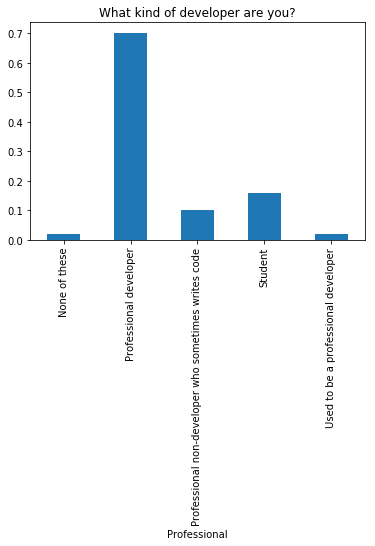

In [93]:
#Provide a pandas series of the counts for each Professional status
status_vals = df.groupby('Professional')['Respondent'].nunique() 

(status_vals/df.shape[0]).plot(kind="bar");
plt.title("What kind of developer are you?");

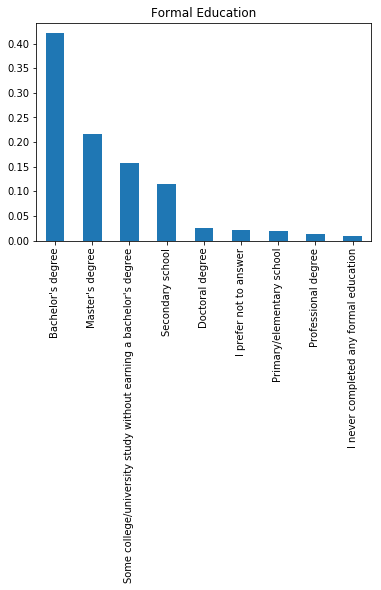

In [97]:
ed_vals = df.FormalEducation.value_counts()#Provide a pandas series of the counts for each FormalEducation status

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Formal Education");

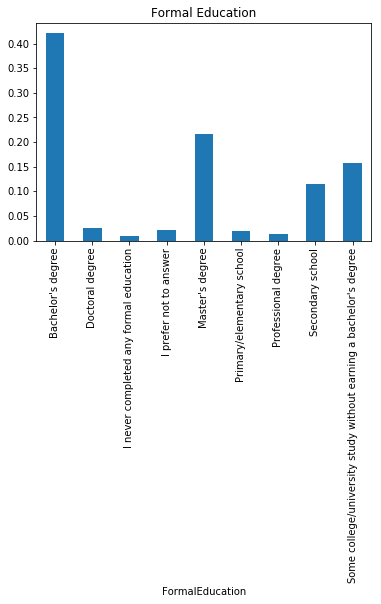

In [94]:
#Provide a pandas series of the counts for each FormalEducation status
ed_vals = df.groupby('FormalEducation')['Respondent'].nunique()

(ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Formal Education");

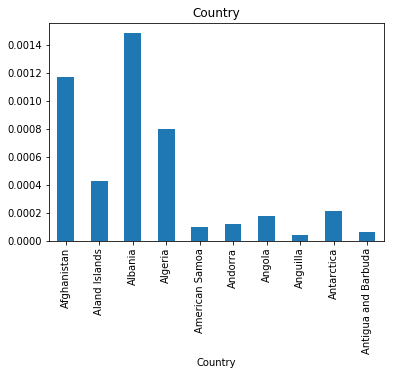

In [95]:
count_vals = df.groupby('Country')['Respondent'].nunique()#Provide a pandas series of the counts for each Country

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Country");

In [3]:
df2 = pd.read_csv('./survey-results-schema.csv')
df2.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [132]:
list(df2[df2.Column == 'CousinEducation']['Question'])[0]

"Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which 

In [129]:
study = df.CousinEducation.value_counts().reset_index()
study.head()

,index,CousinEducation
0,Take online courses; Buy books and work throug...,711
1,Take online courses,551
2,None of these,523
3,Take online courses; Part-time/evening courses...,479
4,Take online courses; Bootcamp; Part-time/eveni...,465


In [130]:
study.rename(columns={'index':'method','CousinEducation':'Count'},inplace=True)
study.head()

,method,Count
0,Take online courses; Buy books and work throug...,711
1,Take online courses,551
2,None of these,523
3,Take online courses; Part-time/evening courses...,479
4,Take online courses; Bootcamp; Part-time/eveni...,465


In [230]:
study['clean_method'] = study.method.apply(lambda x: x.split(';'))

In [224]:
s = study['clean_method'].tolist()

In [236]:
study['clean_method'][0]

' Buy books and work through the exercises'

In [244]:
def higher_ed(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is  in ("Master's degree", "Doctoral", "Professional degree")
        return 0 otherwise
    
    '''
    degrees =("Master's degree", "Doctoral", "Professional degree")
    if formal_ed_str in degrees:
        return 1
    else:
        return 0
    

df["FormalEducation"].apply(higher_ed)[:5] #Test your function to assure it provides 1 and 0 values for the df

0    0
1    0
2    0
3    0
4    1
Name: FormalEducation, dtype: int64

In [246]:
# Check your code here
df['HigherEd'] = df["FormalEducation"].apply(higher_ed)
higher_ed_perc = df['HigherEd'].mean()

In [247]:
higher_ed_perc

0.23069738480697385

In [249]:
#bootcamp graduates in term of job and salary
bootcamp_df = df[df['TimeAfterBootcamp'].isnull()==False]
not_bootcamp_df = df[df['TimeAfterBootcamp'].isnull()==True] 
bootcamp_df.shape

(2602, 155)

In [255]:
bootcamp_df['Gender'].value_counts()/(bootcamp_df.shape[0] - sum(bootcamp_df['Gender'].isnull()))

Male                                                       0.863071
Female                                                     0.112494
Other                                                      0.006455
Gender non-conforming                                      0.005533
Male; Other                                                0.002766
Male; Gender non-conforming                                0.001383
Female; Gender non-conforming                              0.001383
Transgender                                                0.000922
Female; Transgender; Gender non-conforming                 0.000922
Male; Female; Transgender; Gender non-conforming; Other    0.000922
Male; Transgender                                          0.000922
Transgender; Gender non-conforming                         0.000922
Male; Female                                               0.000922
Male; Female; Transgender; Gender non-conforming           0.000461
Female; Gender non-conforming; Other            

In [256]:
not_bootcamp_df['Gender'].value_counts()/(not_bootcamp_df.shape[0] - sum(not_bootcamp_df['Gender'].isnull()))

Male                                                       0.903857
Female                                                     0.071659
Other                                                      0.006418
Male; Other                                                0.005019
Gender non-conforming                                      0.004501
Male; Gender non-conforming                                0.001886
Female; Transgender                                        0.001703
Transgender                                                0.001612
Female; Gender non-conforming                              0.000791
Male; Female; Transgender; Gender non-conforming; Other    0.000395
Male; Female                                               0.000395
Transgender; Gender non-conforming                         0.000395
Male; Transgender                                          0.000274
Female; Transgender; Gender non-conforming                 0.000182
Male; Female; Transgender; Gender non-conforming

In [257]:
bootcamp_df['FormalEducation'].value_counts()/(bootcamp_df.shape[0] - sum(bootcamp_df['FormalEducation'].isnull()))

Bachelor's degree                                                    0.475019
Master's degree                                                      0.225211
Some college/university study without earning a bachelor's degree    0.162567
Secondary school                                                     0.069562
Doctoral degree                                                      0.022291
Professional degree                                                  0.016141
I prefer not to answer                                               0.011914
Primary/elementary school                                            0.009224
I never completed any formal education                               0.008071
Name: FormalEducation, dtype: float64

In [258]:
not_bootcamp_df['FormalEducation'].value_counts()/(not_bootcamp_df.shape[0] - sum(not_bootcamp_df['FormalEducation'].isnull()))

Bachelor's degree                                                    0.417565
Master's degree                                                      0.216335
Some college/university study without earning a bachelor's degree    0.157942
Secondary school                                                     0.117381
Doctoral degree                                                      0.025620
I prefer not to answer                                               0.022095
Primary/elementary school                                            0.020967
Professional degree                                                  0.013794
I never completed any formal education                               0.008301
Name: FormalEducation, dtype: float64

In [261]:
bootcamp_df['TimeAfterBootcamp'].value_counts()/bootcamp_df.shape[0]

I already had a job as a developer when I started the program    0.458493
Immediately upon graduating                                      0.112990
I got a job as a developer before completing the program         0.096849
One to three months                                              0.087625
I haven't gotten a job as a developer yet                        0.081091
Less than a month                                                0.059954
Four to six months                                               0.040354
Longer than a year                                               0.032667
Six months to a year                                             0.029977
Name: TimeAfterBootcamp, dtype: float64

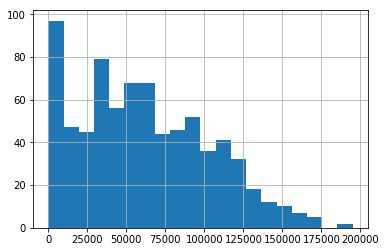

In [265]:
bootcamp_df['Salary'].hist(bins=20);

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


In [5]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [7]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(51392, 154)

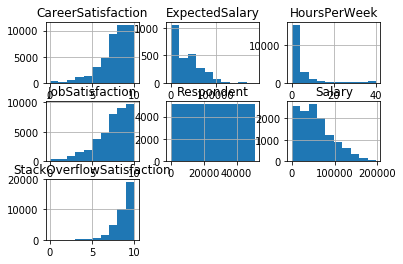

In [9]:
df.hist();

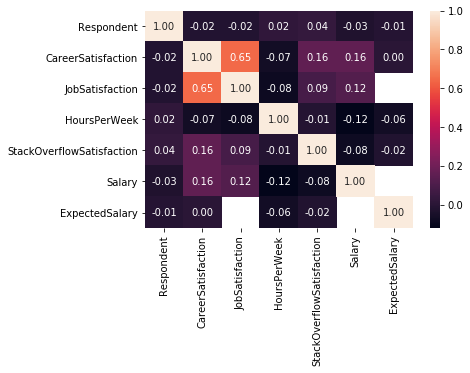

In [10]:
sns.heatmap(df.corr(),annot=True, fmt='.2f');

In [11]:
df.corr()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
Respondent,1.000000,-0.015348,-0.016278,0.023430,0.037309,-0.026780,-0.009201
CareerSatisfaction,-0.015348,1.000000,0.645803,-0.067544,0.155679,0.158223,0.003346
JobSatisfaction,-0.016278,0.645803,1.000000,-0.081532,0.087871,0.120765,NaN
HoursPerWeek,0.023430,-0.067544,-0.081532,1.000000,-0.011730,-0.120114,-0.064397
StackOverflowSatisfaction,0.037309,0.155679,0.087871,-0.011730,1.000000,-0.076674,-0.021426
Salary,-0.026780,0.158223,0.120765,-0.120114,-0.076674,1.000000,NaN
ExpectedSalary,-0.009201,0.003346,NaN,-0.064397,-0.021426,NaN,1.000000


In [22]:
X = df[['CareerSatisfaction','JobSatisfaction','HoursPerWeek','StackOverflowSatisfaction']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state=42)

#instantiate
#fit training data
#predict test data
#score your model on the test

ln_model = LinearRegression(normalize=True)


In [23]:
ln_model.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').